<style>
r { color: Red }
o { color: Orange }
g { color: Green }
</style>

# Epsilon-Greedy

## Basic Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas

## Initializing Constants

In [2]:
NUM_TRIALS = 100000

EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

## Bandit Class

Inside the constructer we take:
- one argument: p -- true win rate for each banidt
- two instance veriables

In [3]:
class BanditArm:
    def __init__(self, p):
        self.p = p
        self.p_estimate = 0.
        self.N = 0 
   
    def pull(self):
        return np.random.random() < self.p
    
    def update(self, x):
        
        self.N += 1
        self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N
         
    def __repr__(self):
        return f'An Arm with {self.p} Win Rate'

## Experiment

In [4]:
def experiment():
    bandits = [BanditArm(p) for p in BANDIT_PROBABILITIES]

    rewards = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax([b.p for b in bandits])
    print(f'optimal bandit: {optimal_j}')

    for i in range(NUM_TRIALS):
        if np.random.random() < EPS:
            num_times_explored += 1
            j = np.random.randint(len(bandits))
        else:
            num_times_exploited += 1
            j = np.argmax([b.p_estimate for b in bandits])

        if j == optimal_j:
            num_optimal += 1

        # pull the arm for the bandit with the largest sample
        x = bandits[j].pull()

        # update rewards log
        rewards[i] = x

# update the distribution for the bandit whose arm we just pulled
        bandits[j].update(x)

    return bandits,rewards,num_times_explored, num_times_exploited, num_optimal

# print mean estimates for each bandit

optimal bandit: 2
Mean Estimate: 0.1903
Mean Estimate: 0.5132
Mean Estimate: 0.7526
Total Reward Earned: 72548.0
Overall Win Rate: 0.7255
# of explored: 10111
# of exploited: 89889
# of times selected the optimal bandit: 93186


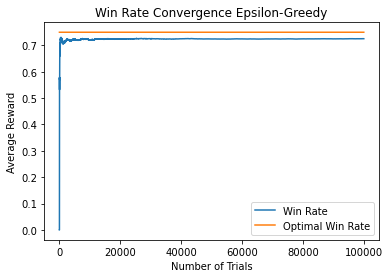

In [5]:
def report():
    bandits,rewards,num_times_explored, num_times_exploited, num_optimal=experiment()
    
    for b in bandits:
        print(f"Mean Estimate: {b.p_estimate :.4f}")
    
    print(f"Total Reward Earned: {rewards.sum()}")
    print(f"Overall Win Rate: {rewards.sum() / NUM_TRIALS :.4f}")
    print(f"# of explored: {num_times_explored}")
    print(f"# of exploited: {num_times_exploited}")
    print(f"# of times selected the optimal bandit: {num_optimal}")
    
    # plot the results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rates, label="Win Rate")
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES), label='Optimal Win Rate')
    plt.legend()
    plt.title("Win Rate Convergence Epsilon-Greedy")
    plt.xlabel("Number of Trials")
    plt.ylabel("Average Reward")
    plt.show()
    
report()

# Changing The Epsilon

## Declaring Constants

In [6]:
NUM_TRIALS = 100000
BANDIT_RETURN = [1.5, 2.5, 3.5]
EPS=[0.1,0.05,0.01]

## Bandit Class

In [7]:
class BanditArm:
    def __init__(self, m):
        self.m = m
        self.m_estimate = 0
        self.N = 0
    
    def pull(self):
        return np.random.randn() + self.m
    
    def update(self, x):
        self.N += 1
        self.m_estimate = (1 - 1.0/self.N)*self.m_estimate + 1.0/self.N*x
            
    def __repr__(self):
        return f'An Arm with {self.m} Win Rate'


In [8]:
def experiment(bandit_return,eps,N=NUM_TRIALS):
    bandits = [BanditArm(p) for p in bandit_return]

    means = np.array(bandit_return) # count number of suboptimal choices
    true_best = np.argmax(means)  
    count_suboptimal = 0

    data = np.empty(N)

    for i in range(N):
        
        p = np.random.random()
        if p < eps:
            j = np.random.choice(len(bandits))
        else:
            j = np.argmax([b.m_estimate for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)

        if j != true_best:
            count_suboptimal += 1

        # for the plot
        data[i] = x

    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    estimated_avg_rewards=[round(b.m_estimate,3) for b in bandits]
    print(f'Estimated average reward where epsilon= {eps}:---{estimated_avg_rewards}')
    print(f'Percent suboptimal where epsilon={eps}:---{float(count_suboptimal)/ N}')
    print("--------------------------------------------------")
    return cumulative_average

In [9]:
[experiment(BANDIT_RETURN,i) for i in EPS]

Estimated average reward where epsilon= 0.1:---[1.5, 2.524, 3.499]
Percent suboptimal where epsilon=0.1:---0.06612
--------------------------------------------------
Estimated average reward where epsilon= 0.05:---[1.49, 2.503, 3.503]
Percent suboptimal where epsilon=0.05:---0.03436
--------------------------------------------------
Estimated average reward where epsilon= 0.01:---[1.577, 2.486, 3.501]
Percent suboptimal where epsilon=0.01:---0.0135
--------------------------------------------------


[array([1.9231358 , 1.10540646, 1.49971449, ..., 3.40070443, 3.40069789,
        3.40070102]),
 array([1.03646244, 2.48502437, 2.28830494, ..., 3.45165574, 3.45166267,
        3.45167536]),
 array([0.53746938, 0.46093807, 0.50350793, ..., 3.48136211, 3.48137814,
        3.48137778])]

Estimated average reward where epsilon= 0.1:---[1.508, 2.501, 3.496]
Percent suboptimal where epsilon=0.1:---0.06727
--------------------------------------------------
Estimated average reward where epsilon= 0.05:---[1.498, 2.525, 3.5]
Percent suboptimal where epsilon=0.05:---0.03539
--------------------------------------------------
Estimated average reward where epsilon= 0.01:---[1.509, 2.499, 3.501]
Percent suboptimal where epsilon=0.01:---0.00715
--------------------------------------------------


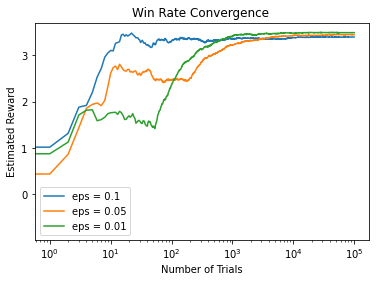

In [10]:
for i in EPS:
    r=experiment(BANDIT_RETURN,i)
    plt.plot(r, label=f'eps = {i}')
    plt.legend()
    plt.title("Win Rate Convergence ")
    plt.xlabel("Number of Trials")
    plt.ylabel("Estimated Reward")
    plt.xscale('log')
plt.show()


# Optimistic Initial Value

## Basic Imports

In [11]:
import numpy as np
import matplotlib.pyplot as plt

## Study Design

In [12]:
NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

## Bandit Class

In [13]:
class BanditArm:
    def __init__(self, p):
        self.p = p
        self.p_estimate = 5
        self.N = 1
   
    def pull(self):
        return np.random.random() < self.p
    def update(self, x):
        self.N += 1.
        self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N
    def __repr__(self):
        return f'An Arm with {self.p} Win Rate'

## Experiment

In [15]:
def experiment():
    bandits=[BanditArm(p) for p in BANDIT_PROBABILITIES]
    rewards = np.zeros(NUM_TRIALS)
    
    for i in range(NUM_TRIALS):
        j=np.argmax([b.p_estimate for b in bandits])
        
        x=bandits[j].pull()
        
        rewards[i]=x
        
        bandits[j].update(x)
    for b in bandits:
        print(f"Mean Estimate: {b.p_estimate}")
    
    print(f"Total Reward Earned: {rewards.sum()}")
    print(f"Overall Win Rate: {rewards.sum() / NUM_TRIALS}")
    
    return rewards

## Reporting

In [16]:
def plot():
    e=experiment()
    cumulative_reward=np.cumsum(e)
    win_rates=cumulative_reward/(np.arange(NUM_TRIALS)+1)
    
    plt.ylim([0,1])
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.title("Win Rate Convergence")
    plt.xlabel("Number of Trials")
    plt.ylabel("Estimated Reward")

    plt.show()

Mean Estimate: 0.6666666666666666
Mean Estimate: 0.7209302325581395
Mean Estimate: 0.7510802934378444
Total Reward Earned: 7496.0
Overall Win Rate: 0.7496


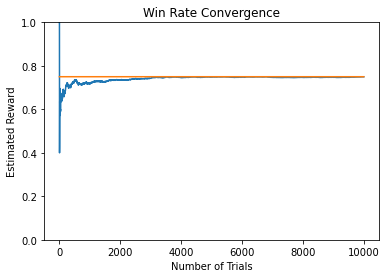

In [17]:
plot()

## UCB1
## Basic Imports

In [18]:
import numpy as np
import matplotlib.pyplot as plt

## Initializing Constants

In [19]:
NUM_TRIALS = 100000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

## Bandit Class

In [20]:
class Bandit:
    def __init__(self, p):
    # p: the win rate
        self.p = p
        self.p_estimate = 0.
        self.N = 0. # num samples collected so far
    def pull(self):
        # draw a 1 with probability p
        return np.random.random() < self.p
    def update(self, x):
        self.N += 1.
        self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N

## UCB 1 Inequality

In [21]:
def ucb(mean, n, nj):
    return mean + np.sqrt(2*np.log(n) / nj)

## Experiment

In [22]:

def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    rewards = np.empty(NUM_TRIALS)
    total_plays = 0

  # initialization: play each bandit once
    for j in range(len(bandits)):
        x = bandits[j].pull()
        total_plays += 1
        bandits[j].update(x)

    for i in range(NUM_TRIALS):
        j = np.argmax([ucb(b.p_estimate, total_plays, b.N) for b in bandits])
        x = bandits[j].pull()
        total_plays += 1
        bandits[j].update(x)

        # for the plot
        rewards[i] = x
    cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)
    for b in bandits:
        print(f"The Estimated Mean: {b.p_estimate}")

    print("Total Reward Earned:", rewards.sum())
    print("overall Win Rate:", rewards.sum() / NUM_TRIALS)
    print("# of times selected each bandit:", [b.N for b in bandits])
    
    return cumulative_average

## Reporting

In [23]:
def report():
    # plot moving average ctr
    cumulative_average=experiment()
    plt.plot(cumulative_average)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.xscale('log')
    plt.title("Win Rate Log Scale")
    plt.xlabel("Number of Trials")
    plt.ylabel("Estimated Reward")
    plt.show()

  # plot moving average ctr linear
    plt.plot(cumulative_average)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.title("Win Rate Linear Scale")
    plt.xlabel("Number of Trials")
    plt.ylabel("Estimated Reward")
    plt.show()

    

The Estimated Mean: 0.19444444444444442
The Estimated Mean: 0.495268138801262
The Estimated Mean: 0.7504467243560137
Total Reward Earned: 74925.0
overall Win Rate: 0.74925
# of times selected each bandit: [72.0, 317.0, 99614.0]


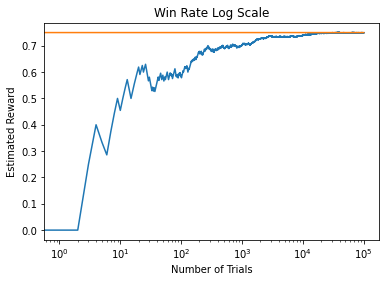

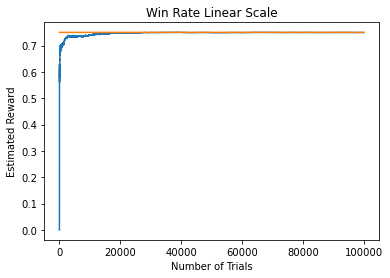

In [24]:
report()

# Beta Distribution

In [25]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
a0, b0= (1,1)
rv0 = beta(a0, b0)
a1, b1 = 4, 3
rv1 = beta(a1, b1)
a2, b2 = 100, 400
rv2 = beta(a2, b2)


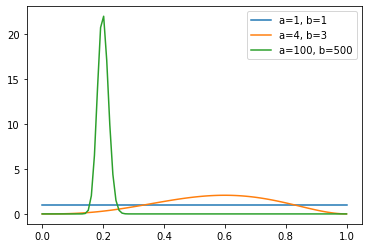

In [26]:
x = np.linspace(0, 1, 100)
plt.plot(x, rv0.pdf(x), label="a=1, b=1")
plt.plot(x, rv1.pdf(x), label="a=4, b=3")
plt.plot(x, rv2.pdf(x), label="a=100, b=500")
plt.legend()
plt.show()

# Thompson Sampling with Bernoulli Reward

## Basic Imports

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

## Initializing Constants

In [28]:
NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

## Bandit Class

In [29]:
class Bandit:
    def __init__(self, p):
        self.p = p
        self.a = 1
        self.b = 1
        self.N = 0

    def pull(self):
        return np.random.random() < self.p

    def sample(self):
        return np.random.beta(self.a, self.b)

    def update(self, x):
        self.a += x
        self.b += 1 - x
        self.N += 1

## Experiment

In [30]:
def plot(bandits, trial):
    x = np.linspace(0, 1, 200)
    for b in bandits:
        y = beta.pdf(x, b.a, b.b)
        plt.plot(x, y, label=f"Real p: {b.p:.2f}, Win Pate = {b.a - 1}/{b.N}")
        #--PAY ATTENTION TO THE PATH--#
        legend_outside = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
        plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400, 
                    bbox_extra_artists=(legend_outside,), bbox_inches='tight')
        plt.title(f"Bandit distributions after {trial} trials")
        plt.legend()
    plt.show()

In [31]:
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

    sample_points = [5,10,20,50,100,200,500,1000,1500,1999]
    rewards = np.zeros(NUM_TRIALS)
    for i in range(NUM_TRIALS):
        j = np.argmax([b.sample() for b in bandits])
    
        # plot the posteriors
        if i in sample_points:
            plot(bandits, i)
        
        x = bandits[j].pull()
        
        rewards[i] = x
        
        bandits[j].update(x)

    # print total reward
    print(f"Total Reward Earned: {rewards.sum()}")
    print(f"Overall Win Rate: {rewards.sum() / NUM_TRIALS}")
    print(f"NUmber of times selected each bandit: {[b.N for b in bandits]}")

## Reporting

C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,
C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,
C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,


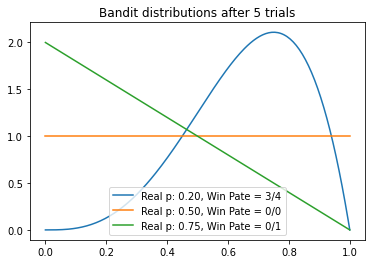

C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,
C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,
C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,


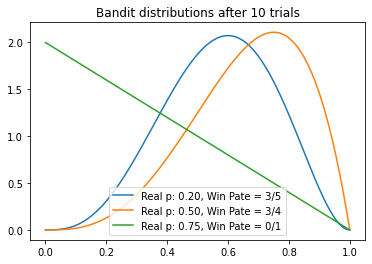

C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,
C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,
C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,


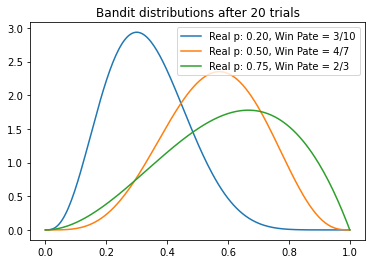

C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,
C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,
C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,


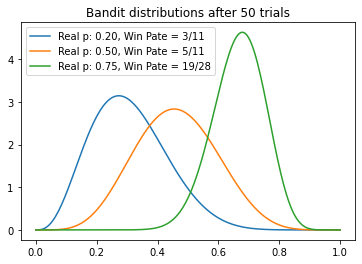

C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,
C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,
C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,


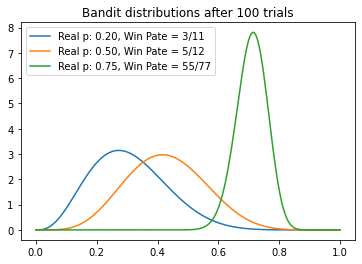

C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,
C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,
C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,


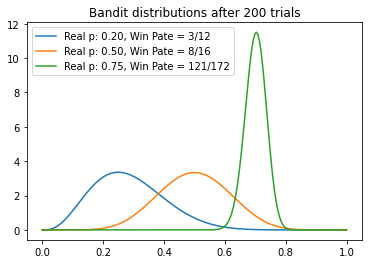

C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,
C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,
C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,


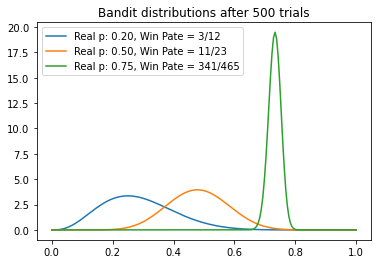

C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,
C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,
C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,


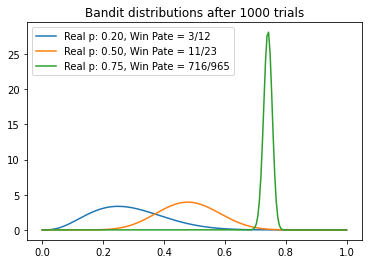

C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,
C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,
C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,


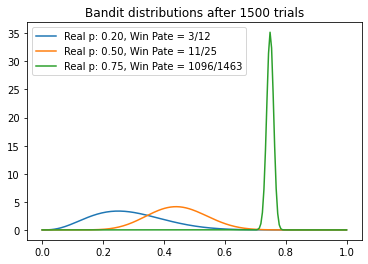

C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,
C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,
C:\Users\user\AppData\Local\Temp\ipykernel_8024\833615595.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "absdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f"img/output/bernoulli_{trial}.png", absdpi=400,


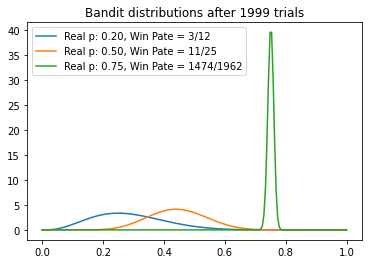

Total Reward Earned: 1489.0
Overall Win Rate: 0.7445
NUmber of times selected each bandit: [12, 25, 1963]


In [32]:
experiment()

# Tompson Sampling with Gaussian Reward

## Basic Imports

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Initializing Constants

In [34]:
np.random.seed(1)
NUM_TRIALS = 2000
BANDIT_MEANS = [1, 2, 3]

## Bandit Class

In [35]:
class Bandit:
    def __init__(self, true_mean):
        self.true_mean = true_mean
        # parameters for mu - prior is N(0,1)
        self.m = 0
        self.lambda_ = 1
        self.tau = 1
        self.N = 0

    def pull(self):
        return np.random.randn() / np.sqrt(self.tau) + self.true_mean

    def sample(self):
        return np.random.randn() / np.sqrt(self.lambda_) + self.m

    def update(self, x):
        self.m = (self.tau * x + self.lambda_ * self.m) / (self.tau + self.lambda_)
        self.lambda_ += self.tau
        self.N += 1

## Experiment

In [37]:
def plot(bandits, trial):
    x = np.linspace(-3, 6, 200)
    for b in bandits:
        y = norm.pdf(x, b.m, np.sqrt(1. / b.lambda_))
        plt.plot(x, y, label=f"True Mean: {b.true_mean:.2f}, Num of Trials: {b.N}")
        #--PAY ATTENTION TO THE PATH--#
        legend_outside = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
        plt.savefig(f"img/output/Gaussian_{trial}.png", dpi=400, 
                    bbox_extra_artists=(legend_outside,), bbox_inches='tight')
        plt.title(f"Bandit distributions after {trial} trials")
    plt.legend()
    plt.show()


def experiment():
    bandits = [Bandit(m) for m in BANDIT_MEANS]

    sample_points = [5,10,20,50,100,200,500,1000,1500,1999]
    rewards = np.empty(NUM_TRIALS)
    for i in range(NUM_TRIALS):
        j = np.argmax([b.sample() for b in bandits])

        if i in sample_points:
            plot(bandits, i)
            
        x = bandits[j].pull()

        bandits[j].update(x)
        
        rewards[i] = x

    cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)
    
    plt.plot(cumulative_average)
    
    for m in BANDIT_MEANS:
        plt.plot(np.ones(NUM_TRIALS)*m)
        
    plt.show()

    return cumulative_average

## Reporting

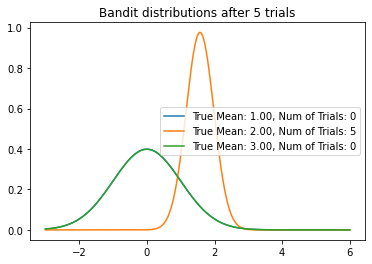

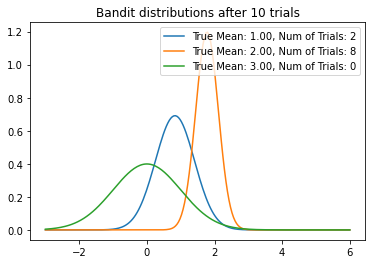

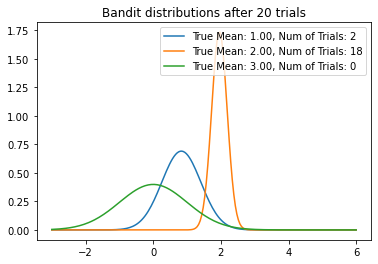

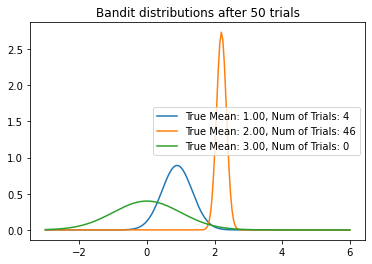

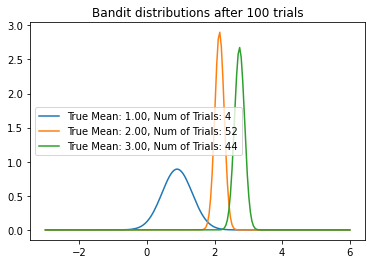

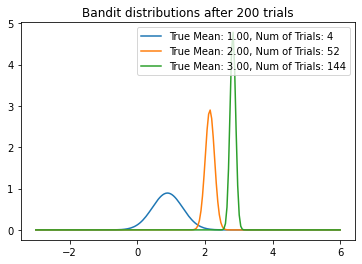

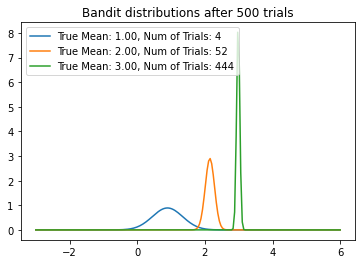

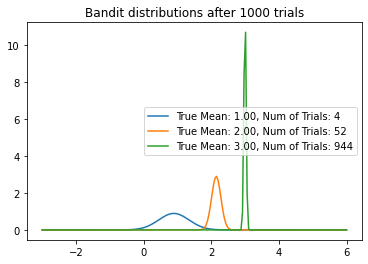

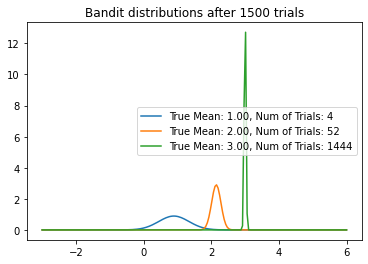

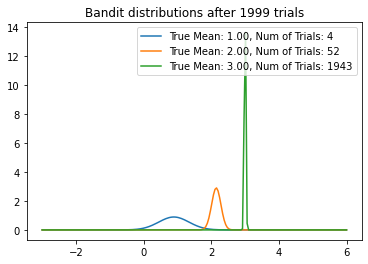

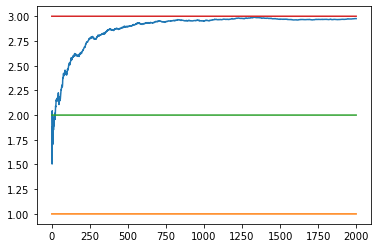

array([1.87710977, 1.59272451, 1.5047343 , ..., 2.97611875, 2.97559304,
       2.97593084])

In [38]:
experiment()